In [1]:
# Install necessary libraries if not already installed
# pip install nltk pandas openpyxl

import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the dataset
file_path = r"C:\Users\Shrey\Documents\Research\Dr. Sun Research\NLP_and_Sentiment_Analysis_Tasks\master-file.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(df.head())

# Download required NLTK resources (only need to run once)
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Contraction mapping (case-insensitive)
contractions = {
    "here's": "here is",
    "isn't": "is not",
    "it's": "it is",
    "can't": "cannot",
    # Add more contractions as needed
}

def expand_contractions(text):
    """Expand contractions in the text."""
    for contraction, expanded in contractions.items():
        text = text.replace(contraction, expanded)
    return text

def preprocess_text(text):
    """Preprocess the text by lowercasing, expanding contractions, tokenizing, removing punctuation, stopwords, and lemmatizing."""
    text = text.lower()  # Convert to lower case
    text = expand_contractions(text)  # Expand contractions
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in string.punctuation]  # Remove punctuation
    processed_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization and stop word removal
    return ' '.join(processed_words)

# Apply the preprocessing function to the transcript column
df['Cleaned_Text'] = df['transcript'].apply(preprocess_text)

# Display the original and cleaned text for comparison
print(df[['transcript', 'Cleaned_Text']])


   iteration_cycle                        participant_id  \
0                1  7c62b16e-44fd-4bcd-8edb-949e2e3ce346   
1                1  033e92ab-9980-4ab1-b545-1d4c78a1db98   
2                1  7c62b16e-44fd-4bcd-8edb-949e2e3ce346   
3                1  7c62b16e-44fd-4bcd-8edb-949e2e3ce346   
4                1  7c62b16e-44fd-4bcd-8edb-949e2e3ce346   

                               table_id                               room_id  \
0  99d12d10-1700-46aa-9e41-c4a4cf144325  165f76f0-3497-4f71-a70b-48fe766de5df   
1  99d12d10-1700-46aa-9e41-c4a4cf144325  165f76f0-3497-4f71-a70b-48fe766de5df   
2  99d12d10-1700-46aa-9e41-c4a4cf144325  165f76f0-3497-4f71-a70b-48fe766de5df   
3  99d12d10-1700-46aa-9e41-c4a4cf144325  165f76f0-3497-4f71-a70b-48fe766de5df   
4  99d12d10-1700-46aa-9e41-c4a4cf144325  165f76f0-3497-4f71-a70b-48fe766de5df   

  speaker   joined_at  start_time start_timestamp  end_time end_timestamp  \
0    Hope  2:36:23 PM       1.789      2:36:24 PM     5.739    2:36:28 PM  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                             transcript  \
0     I know exactly. And this is, I don't, hello. M...   
1                                                   No.   
2           I don't get cause that was the thing I was,   
3     I was gonna try that too but I was just like i...   
4     up to everybody else and I wanted to see if th...   
...                                                 ...   
1434                      also play a key role in this.   
1435                                              Yeah.   
1436                                               Mhm.   
1437                                              Yeah.   
1438                                               Mhm.   

                     Cleaned_Text  
0     know exactly n't hello name  
1                                  
2             n't get cause thing  
3                 gon na try like  
4       everybody else wanted see  
...                           ...  
1434           also play key role  
143

In [2]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

# Apply the sentiment analysis function
df['Sentiment_Scores'] = df['Cleaned_Text'].apply(get_sentiment)

# Display the sentiment scores
print(df[['Cleaned_Text', 'Sentiment_Scores']])


                     Cleaned_Text  \
0     know exactly n't hello name   
1                                   
2             n't get cause thing   
3                 gon na try like   
4       everybody else wanted see   
...                           ...   
1434           also play key role   
1435                         yeah   
1436                          mhm   
1437                         yeah   
1438                          mhm   

                                       Sentiment_Scores  
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1     {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...  
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3     {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...  
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
...                                                 ...  
1434  {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...  
1435  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...  
1436  {'neg': 0.0, 'neu': 1.0, 'p

In [3]:
# Function to classify overall sentiment based on the compound score
def classify_sentiment(scores):
    compound = scores['compound']
    if compound >= 0.01:
        return 'Positive'
    elif compound <= -0.01:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification function to the Sentiment_Scores column
df['Overall_Sentiment'] = df['Sentiment_Scores'].apply(classify_sentiment)

# Display the DataFrame with the new Overall_Sentiment column
print(df[['Cleaned_Text', 'Sentiment_Scores', 'Overall_Sentiment']])


                     Cleaned_Text  \
0     know exactly n't hello name   
1                                   
2             n't get cause thing   
3                 gon na try like   
4       everybody else wanted see   
...                           ...   
1434           also play key role   
1435                         yeah   
1436                          mhm   
1437                         yeah   
1438                          mhm   

                                       Sentiment_Scores Overall_Sentiment  
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...           Neutral  
1     {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...           Neutral  
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...           Neutral  
3     {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...          Positive  
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...           Neutral  
...                                                 ...               ...  
1434  {'neg': 0.0, 'neu

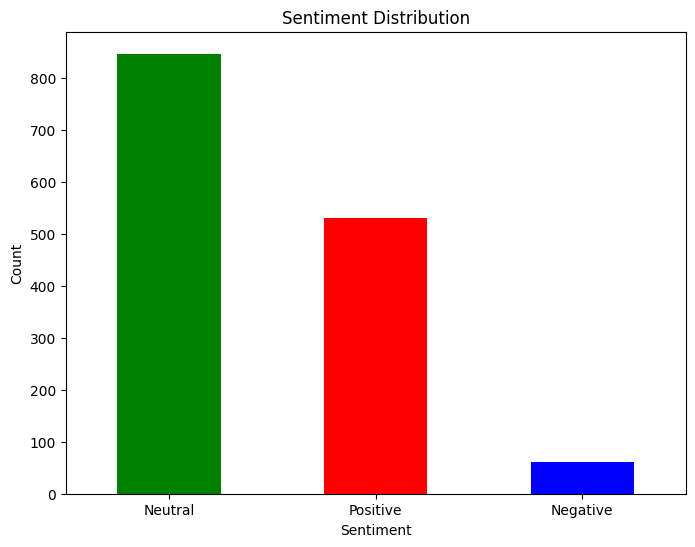

In [4]:
import matplotlib.pyplot as plt

# Count occurrences of each sentiment
sentiment_counts = df['Overall_Sentiment'].value_counts()

# Plot the results
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
